In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [20]:
ev_sales = pd.read_csv("/content/ev_sales.csv")
ev_sales.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,NaN,40.0,NaN,NaN,NaN,7.0,159
1,Arunachal Pradesh,14,NaN,5,NaN,NaN,NaN,NaN,NaN,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,NaN,NaN,NaN,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,NaN,NaN,NaN,8.0,64241
4,Chandigarh,298,1410.0,182,NaN,40.0,NaN,NaN,NaN,1.0,1931


In [21]:
ev_sales.columns

Index(['State Name', 'Two Wheeler', 'Three Wheeler', 'Four Wheeler',
       'Goods Vehicles', 'Public Service Vehicle', 'Special Category Vehicles',
       'Ambulance/Hearses', 'Construction Equipment Vehicle', 'Other',
       'Grand Total'],
      dtype='object')

In [22]:
ev_sales = ev_sales.fillna(0)
ev_sales.head()

,State Name,Two Wheeler,Three Wheeler,Four Wheeler,Goods Vehicles,Public Service Vehicle,Special Category Vehicles,Ambulance/Hearses,Construction Equipment Vehicle,Other,Grand Total
0,Andaman and Nicobar Island,1,30.0,81,0.0,40.0,0.0,0.0,0.0,7.0,159
1,Arunachal Pradesh,14,0.0,5,0.0,0.0,0.0,0.0,0.0,1.0,20
2,Assam,721,47041.0,161,7.0,15.0,0.0,0.0,0.0,2.0,47947
3,Bihar,5003,59079.0,114,11.0,26.0,0.0,0.0,0.0,8.0,64241
4,Chandigarh,298,1410.0,182,0.0,40.0,0.0,0.0,0.0,1.0,1931


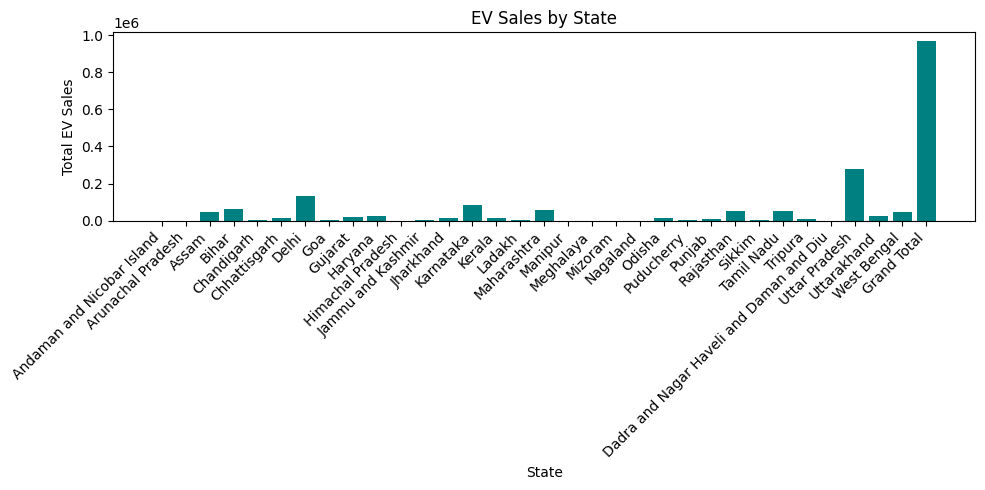

In [23]:
plt.figure(figsize=(10, 5))
plt.bar(ev_sales['State Name'], ev_sales['Grand Total'], color='teal')
plt.title('EV Sales by State')
plt.xlabel('State')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

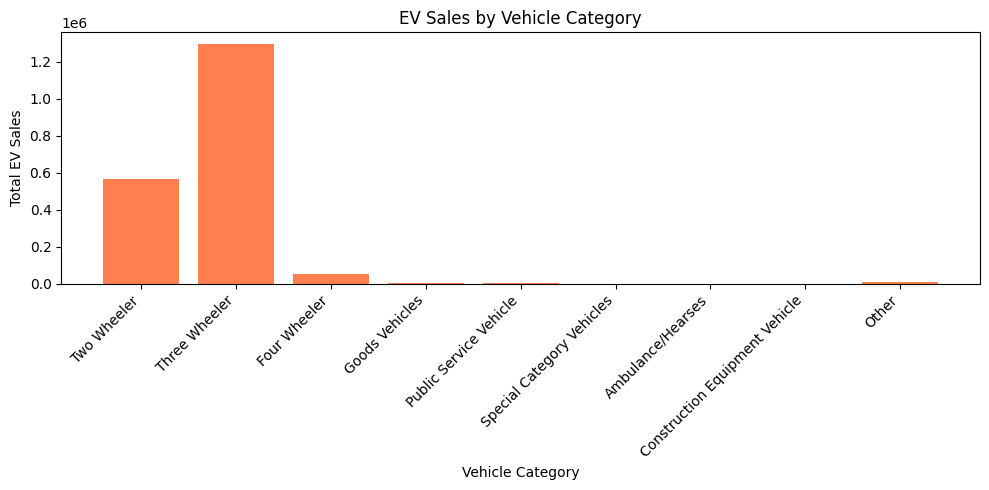

In [24]:
category_columns = ['Two Wheeler', 'Three Wheeler', 'Four Wheeler',
                    'Goods Vehicles', 'Public Service Vehicle',
                    'Special Category Vehicles', 'Ambulance/Hearses',
                    'Construction Equipment Vehicle', 'Other']

category_totals = ev_sales[category_columns].sum()
plt.figure(figsize=(10, 5))
plt.bar(category_totals.index, category_totals.values, color='coral')
plt.title('EV Sales by Vehicle Category')
plt.xlabel('Vehicle Category')
plt.ylabel('Total EV Sales')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [25]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
data = {
    'Vehicle Type': ['Two Wheeler', 'Three Wheeler', 'Four Wheeler'],
    'Total Sales': [6037, 107560, 543],
    'State Spread': [5, 5, 5],  # how many states they are present in
    'Use Case Versatility': [8, 9, 6],
    'Infra Support': [7, 6, 5],
    'Competition Level': [5, 6, 3]
}

df = pd.DataFrame(data).set_index('Vehicle Type')

scaler = MinMaxScaler()
cols_to_normalize = ['Total Sales', 'State Spread', 'Use Case Versatility', 'Infra Support']
df_scaled = pd.DataFrame(scaler.fit_transform(df[cols_to_normalize]),
                         columns=cols_to_normalize, index=df.index)
df_scaled['Low Competition'] = scaler.fit_transform(1 / df[['Competition Level']])
weights = {
    'Total Sales': 0.4,
    'State Spread': 0.1,
    'Use Case Versatility': 0.2,
    'Infra Support': 0.2,
    'Low Competition': 0.1
}

df_scaled['Final Score'] = sum(df_scaled[col] * w for col, w in weights.items())
df_scaled = df_scaled.sort_values('Final Score', ascending=False)
print("Recommended vehicle category to manufacture:\n")
print(df_scaled[['Final Score']])


Recommended vehicle category to manufacture:

               Final Score
Vehicle Type              
Three Wheeler     0.700000
Two Wheeler       0.373868
Four Wheeler      0.100000


In [26]:
#Data up to 2023 shows 3-wheelers leading in total sales, especially in states like Bihar and Assam. However, for a startup, 2-wheelers are the better choice—lower cost, broader use, and faster adoption.

#From further segmentation using data up to 2025, there's a huge spike in 2-wheeler sales, confirming it's the most promising segment for new EV ventures.